# ELE510 Image Processing with robot vision: LAB, Exercise 5, Frequency-domain processing.


**Purpose:** *To learn about the Fourier Transform and its use for computation of the image Frequency Spectrum. The emphasis is on the fundamentals of digital images.*

The theory for this exercise can be found in chapter 6 of the text book [1] and in appendix A.1.3 in the compendium [2]. See also the following documentations for help:
- [OpenCV](https://opencv.org/opencv-python-free-course/)
- [numpy](https://numpy.org/doc/stable/)
- [matplotlib](https://matplotlib.org/stable/contents.html)
- [scipy](https://docs.scipy.org/doc/)

**IMPORTANT:** Read the text carefully before starting the work. In
many cases it is necessary to do some preparations before you start the work
on the computer. Read necessary theory and answer the theoretical part
frst. The theoretical and experimental part should be solved individually.
The notebook must be approved by the lecturer or his assistant.

**Approval:**
<div class="alert alert-block alert-success">
The current notebook should be submitted on CANVAS as a single pdf file. 
</div>

<div class="alert alert-block alert-info">
    To export the notebook in a pdf format, goes to File -> Download as -> PDF via LaTeX (.pdf).
</div>

**Note regarding the notebook**: The theoretical questions can be answered directly on the notebook using a *Markdown* cell and LaTex commands (if relevant). In alternative, you can attach a scan (or an image) of the answer directly in the cell.

Possible ways to insert an image in the markdown cell:

`![image name]("image_path")`

`<img src="image_path" alt="Alt text" title="Title text" />`


**Under you will find parts of the solution that is already programmed.**

<div class="alert alert-block alert-info">
    <p>You have to fill out code everywhere it is indicated with `...`</p>
    <p>The code section under `######## a)` is answering subproblem a) etc.</p>
</div>

## Problem 1

The Fourier Transform is separable, that means that the two-dimensional transform is a sequence of two one-dimensional transforms. 
For images this can be considered as a transform along rows followed by a transform along columns (note that the input to the second step is the result from the first step, i.e. an image where the rows represents frequency and the columns space, $F(f_{x},y)$). 
To get a better understanding of the **DFT** it is therefore convenient to study the one-dimensional transform:

\begin{equation}
    G(k) = \sum_{x=0}^{w-1} g(x)e^{-j2\pi\frac{kx}{w}}, \qquad k = 0, 1, 2, \;\cdots\;,(w-1),
\end{equation}

and its inverse, **IDFT**:

\begin{equation}
    g(x) = \frac{1}{w}\sum_{k=0}^{w-1} G(k)e^{j2\pi\frac{kx}{w}}, \qquad  x = 0, 1, 2,\;\cdots\;,(w-1).
\end{equation}

One period of the signal is $g(x),\, x = 0, 1, 2,\;\cdots\;,(w-1)$ and in the frequency domain $F(k),\, k = 0, 1, 2, \;\cdots\;,(w-1)$.

**a)** Find the DC-component, $G(0)$. What does $\frac{G(0)}{w}$ represent?

\begin{equation}
G(0) = \sum_{x=0}^{w-1} g(x)e^{-j2\pi\frac{0x}{w}} = \sum_{x=0}^{w-1} g(x)
\end{equation}

So, $G(0)$ represents the sum of all the values of the signal $g(x)$, and therefore $\frac{G(0)}{w}$ represents the average value of the signal $g(x)$.

**b)** Show that the DFT is periodic, i.e. $G(k) = G(k+l\cdot w)$, where $l$ is an arbitrary integer.


\begin{align*}
G(k + l \cdot w) &= \sum_{x=0}^{w-1} g(x)e^{-j2\pi\frac{(k + l \cdot w)x}{w}} \\
&= \sum_{x=0}^{w-1} g(x)e^{-j2\pi\frac{kx}{w}}e^{-j2\pi\frac{l \cdot wx}{w}} \\
&= \sum_{x=0}^{w-1} g(x)e^{-j2\pi\frac{kx}{w}}e^{-j2\pi l x} \\
&\stackrel{*}{=} \sum_{x=0}^{w-1} g(x)e^{-j2\pi\frac{kx}{w}} \cdot 1 \\
&= G(k)
\end{align*}

$*$ Since $e^{ix} = \cos(x) + i\sin(x)$ and $l, x \in \mathbb{Z} \rightarrow l \cdot x \in \mathbb{Z}$, we have:
\begin{align*}
e^{-j2\pi l x} &= \cos(-2\pi l x) + i\sin(-2\pi l x) \\
&= \cos(2\pi l x) - i\sin(2\pi l x) \\
&= 1 - i \cdot 0 \\
&= 1
\end{align*}

**c)** Find $G(k)$ for the centered box-function with 5 non-zero samples, $w = 16$.
\begin{equation}
    g(x)  =
    \begin{cases}
          1  \qquad \text{for} \qquad   x = 0, 1, 2\;\text{and}\;14,15. \\
          0   \qquad \text{otherwise,}
    \end{cases}
\end{equation}

\begin{align*}
G(k) &= \sum_{x=0}^{w-1} g(x)e^{-j2\pi\frac{kx}{w}} \\
&= \sum_{x=0}^{15} g(x)e^{-j2\pi\frac{kx}{16}} \\
&= \sum_{x=0}^{2} e^{-j2\pi\frac{kx}{16}} + \sum_{x=14}^{15} e^{-j2\pi\frac{kx}{16}} \\
&= e^{-j2\pi\frac{k\cdot 0}{16}} + e^{-j2\pi\frac{k\cdot 1}{16}} + e^{-j2\pi\frac{k\cdot 2}{16}} + e^{-j2\pi\frac{k\cdot 14}{16}} + e^{-j2\pi\frac{k\cdot 15}{16}} \\
&= 1 + e^{-j\frac{k}{8}\pi} + e^{-j\frac{k}{4}\pi} + e^{-j\frac{7k}{4}\pi} + e^{-j\frac{15k}{8}\pi} \\
\end{align*}

## Problem 2
**a)**  Use $g(x)$ as defined in **1 c)**, for $x \in [0,15]$. Use  **numpy.fft.fft**  for finding the dft, $G(k)$.  Plot both $g(x)$ and $G(k)$.  Also plot the mathematical solution from probelm c) and see if / how they correspond.  

You can also try to sketch $g(x)$ and $G(k)$ in the index range $-8,-7,\;\cdots\;,-1, 0, 1, 2,\;\cdots\;,7$ (note the periodic property of both functions).  


In [1]:
import os
import matplotlib.pyplot as plt  
import math
import numpy as np
import cv2

/Users/tilmohr/micromamba/envs/cv/lib/python3.11/site-packages/numpy/ma/core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/Users/tilmohr/micromamba/envs/cv/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


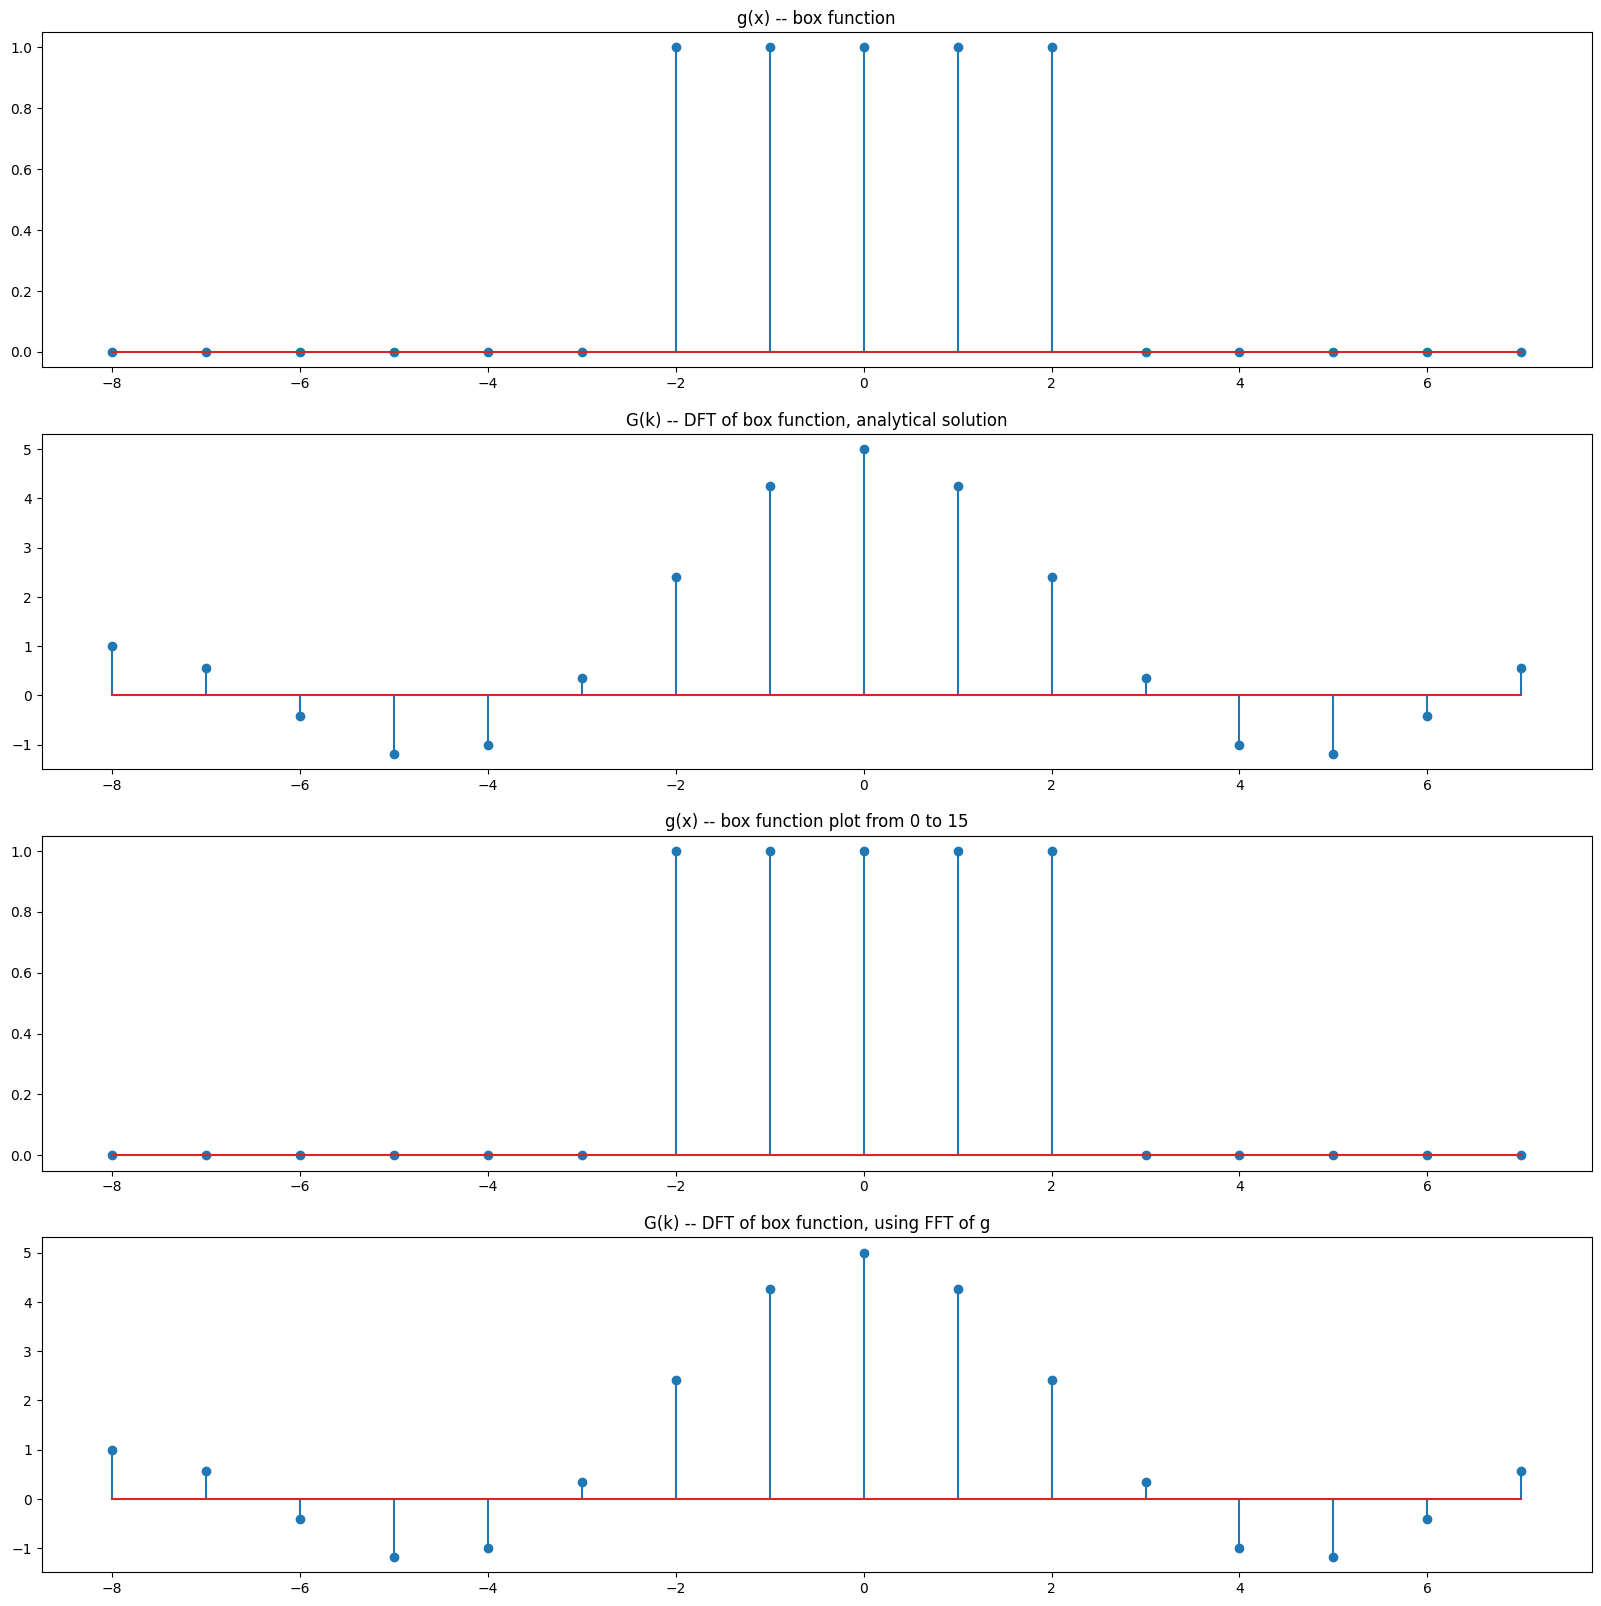

In [2]:
# Sketch it using python.

# Both functions are discrete and periodic with period N=16. Note that the DFT of the discrete box
# function approximates a truncated "sinc" function. The continuous Fourier transform of the
# continuous box function is a "sinc" function with infinite duration.
#  INSERT CODE:

n = np.arange(-8,8,1)
f = np.array([1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1])
# wrap around f (currently indexed 0-15) to be indexed -8 to 7 (as n)
f = np.concatenate((f[8:], f[:8]))
def func_analyitcal(k):
    return (
        1 +
        np.exp(-1j * k/8 * np.pi) +
        np.exp(-1j * k/4 * np.pi) +
        np.exp(-1j * 7*k/4 * np.pi) +
        np.exp(-1j * 15*k/8 * np.pi)
    )
F = np.array([func_analyitcal(k) for k in n])


# Visualization of the result from the calculations, with zeros in the midle :
plt.figure(figsize=(20,20))
plt.subplot(411)
plt.stem(n,f)
plt.title('g(x) -- box function')
plt.subplot(412)
plt.stem(n,F)
plt.title('G(k) -- DFT of box function, analytical solution')

# Visualization of the results from using numpy.fft.fft.  
#  INSERT CODE 

g = np.array([1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1])
G = np.fft.fft(g)
# wrap around g (currently indexed 0-15) to be indexed -8 to 7 (as n)
g = np.concatenate((g[8:], g[:8]))
# wrap around G (currently indexed 0-15) to be indexed -8 to 7 (as n)
G = np.concatenate((G[8:], G[:8]))


plt.subplot(413)
plt.stem(n,g)
plt.title('g(x) -- box function plot from 0 to 15')
plt.subplot(414)
plt.stem(n,G)
plt.title('G(k) -- DFT of box function, using FFT of g')

plt.show()



The analytical solution and the numerical solution are visually indistinguishable.

## Problem 3

**a)**   
In **Problem 2** the DFT (fft) was real - by coincidence.   In general it is complex.   In this part we will take in an image and look at it in space-domain (the image itself) and in frequency domain looking at just **the magnitude** of the DFT.  
Useful functions :  **numpy.fft.fft2** ,  **numpy.fft.fftshift** .  
Import an image as a grayscale image.  It can be your own image for fun ( our just do soapbubbles.png).  Fill inn the cell below, finding a zero mean version of the image and the DFT of both the iage and the zero mean image.



In [3]:
# Import an image I as grayscale 
imagepath = "images/soapbubbles.png"
I = cv2.imread(imagepath, cv2.IMREAD_GRAYSCALE)

#Remove the mean from the image I, make the zero mean image Iz.  
Iz = I - np.mean(I)

# Compute the 2D DFT of the image I and the zero-mean image Izm.  Shift so that the zero-frequency component is at the center of the image.
# se np.fft.fftshift 

DFT_I = np.fft.fft2(I)
DFT_SHIFT_I = np.fft.fftshift(DFT_I)
DFT_Iz = np.fft.fft2(Iz)
DFT_SHIFT_Iz = np.fft.fftshift(DFT_Iz)


**b)**  
Now you will find the magnitude of the DFT of I and Iz.  You are going to make a plot where you plot the image at the top, one row with the magnitude directly of I and Iz, and another where we do the scaling we do for display purposes as we talked about in class using the logarithm of the logarithm(1+magnitude(DFT)) .  

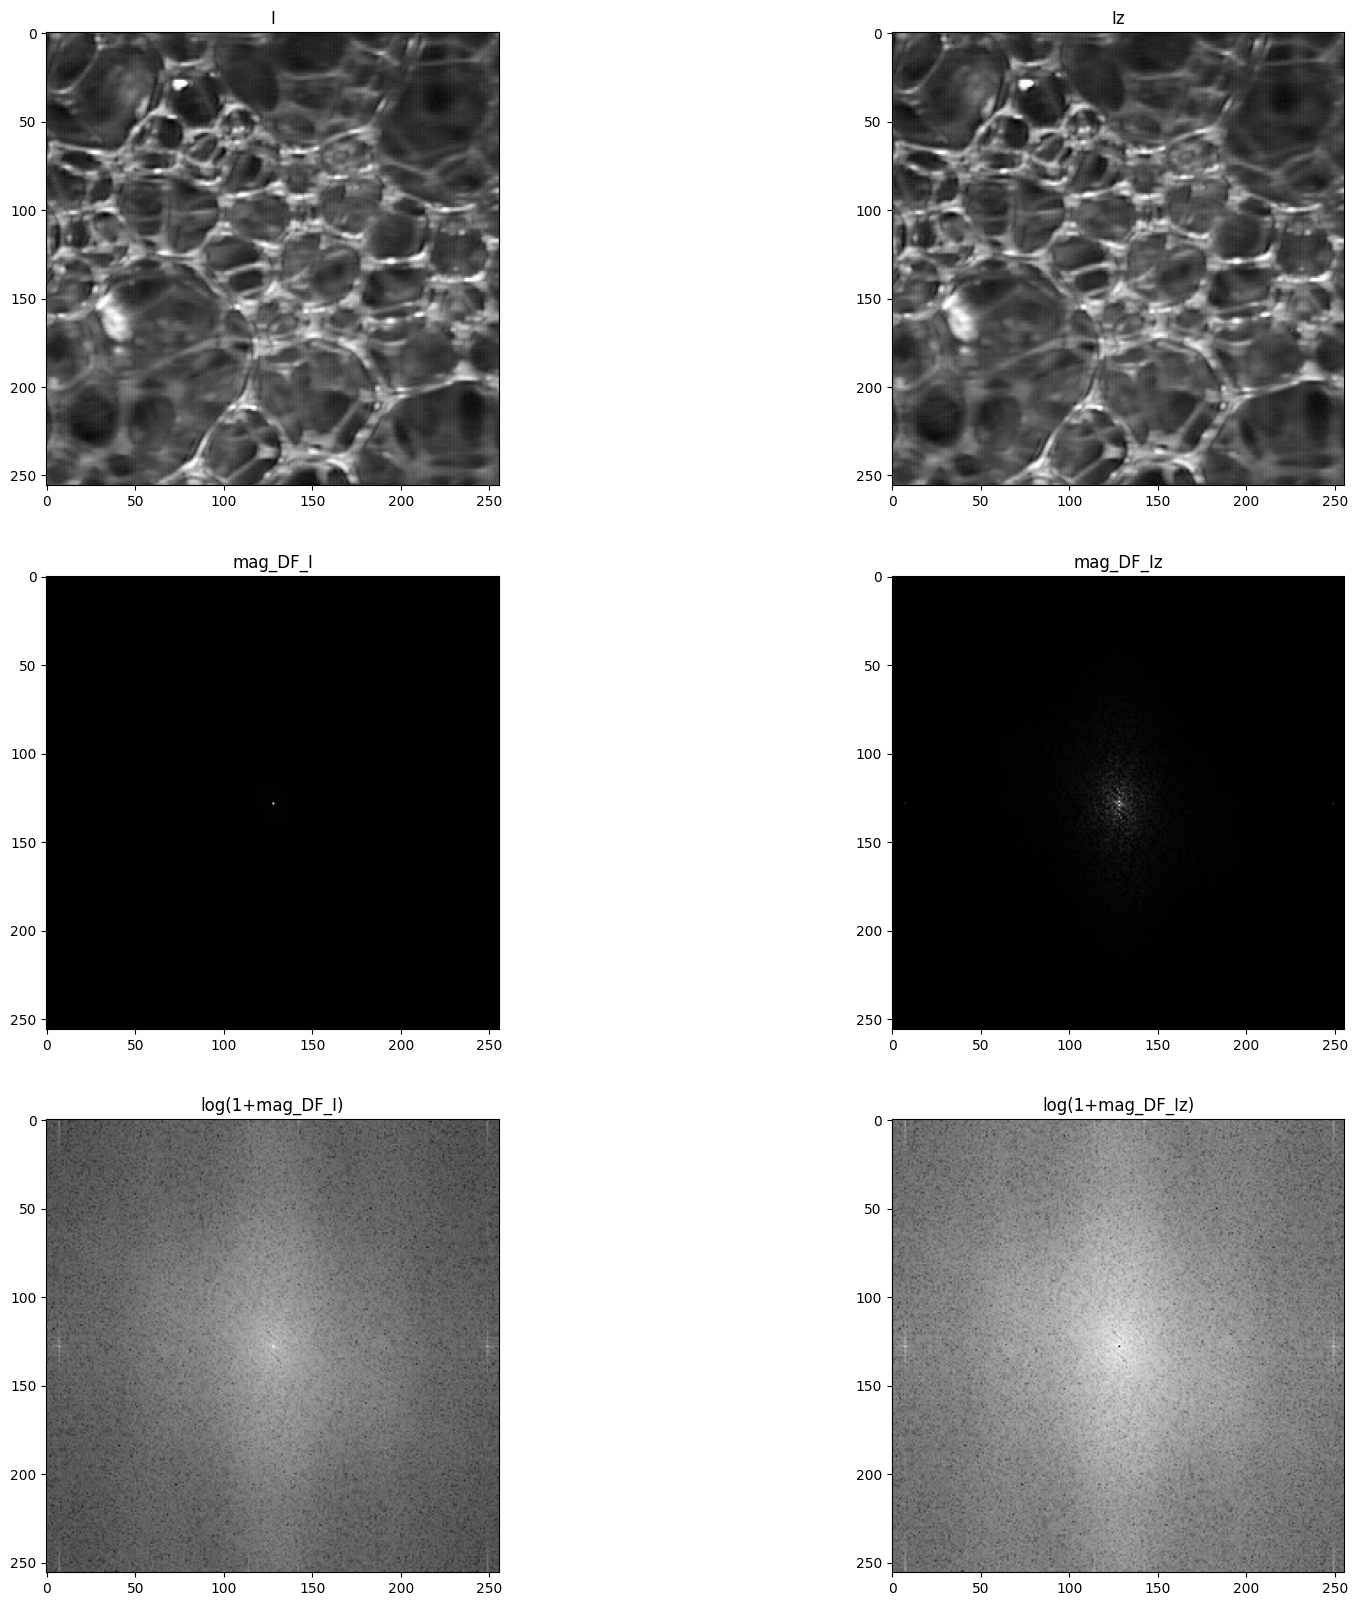

In [4]:
# plot here

mag_DF_I = np.abs(DFT_SHIFT_I)
mag_DF_Iz = np.abs(DFT_SHIFT_Iz)

plt.figure(figsize=(20,20))
plt.subplot(321)
plt.imshow(I, cmap='gray')
plt.title('I')
plt.subplot(322)
plt.imshow(Iz, cmap='gray')
plt.title('Iz')
plt.subplot(323)
plt.imshow(mag_DF_I, cmap='gray')
plt.title('mag_DF_I')
plt.subplot(324)
plt.imshow(mag_DF_Iz, cmap='gray')
plt.title('mag_DF_Iz')
plt.subplot(325)
plt.imshow(np.log(1+mag_DF_I), cmap='gray')
plt.title('log(1+mag_DF_I)')
plt.subplot(326)
plt.imshow(np.log(1+mag_DF_Iz), cmap='gray')
plt.title('log(1+mag_DF_Iz)')
plt.show()

**c)** Comment on both the difference we see on the magnitude for I and Iz as well as with and without the scaling  

In the normal magnitude images, I just has one bright pixel in the middle at 0 frequency. It makes sense, that when we then substract the mean value, that we see more frequencies in Iz, as we do (low-frequencies). When applying the logarithm, one can however see that the DFT of I overall appears darker than the DFT of Iz, so the DFT of Iz has more amplitude in its frequencies - beside the 0-frequency, which appears 0 (since the mean pixel value of Iz is 0).

## Problem 4

**a)**  
Now we will consider both the magnitude and the phase.  Lets input two images convert to DFT and see we get the image back doing IDFT.  Also convert to DFT and switch the phase between the images before IDFT and look at the results.  
Use two images of choice.  Just rescale or crop so you have to images the same size before doing the DFT.  (alternative use BorderCollie.jpeg and zebra.jpeg , they are the same size)  Plot the DFT (scaled magnitude and phase) and the reconstructed images with the right and wrong phase.  

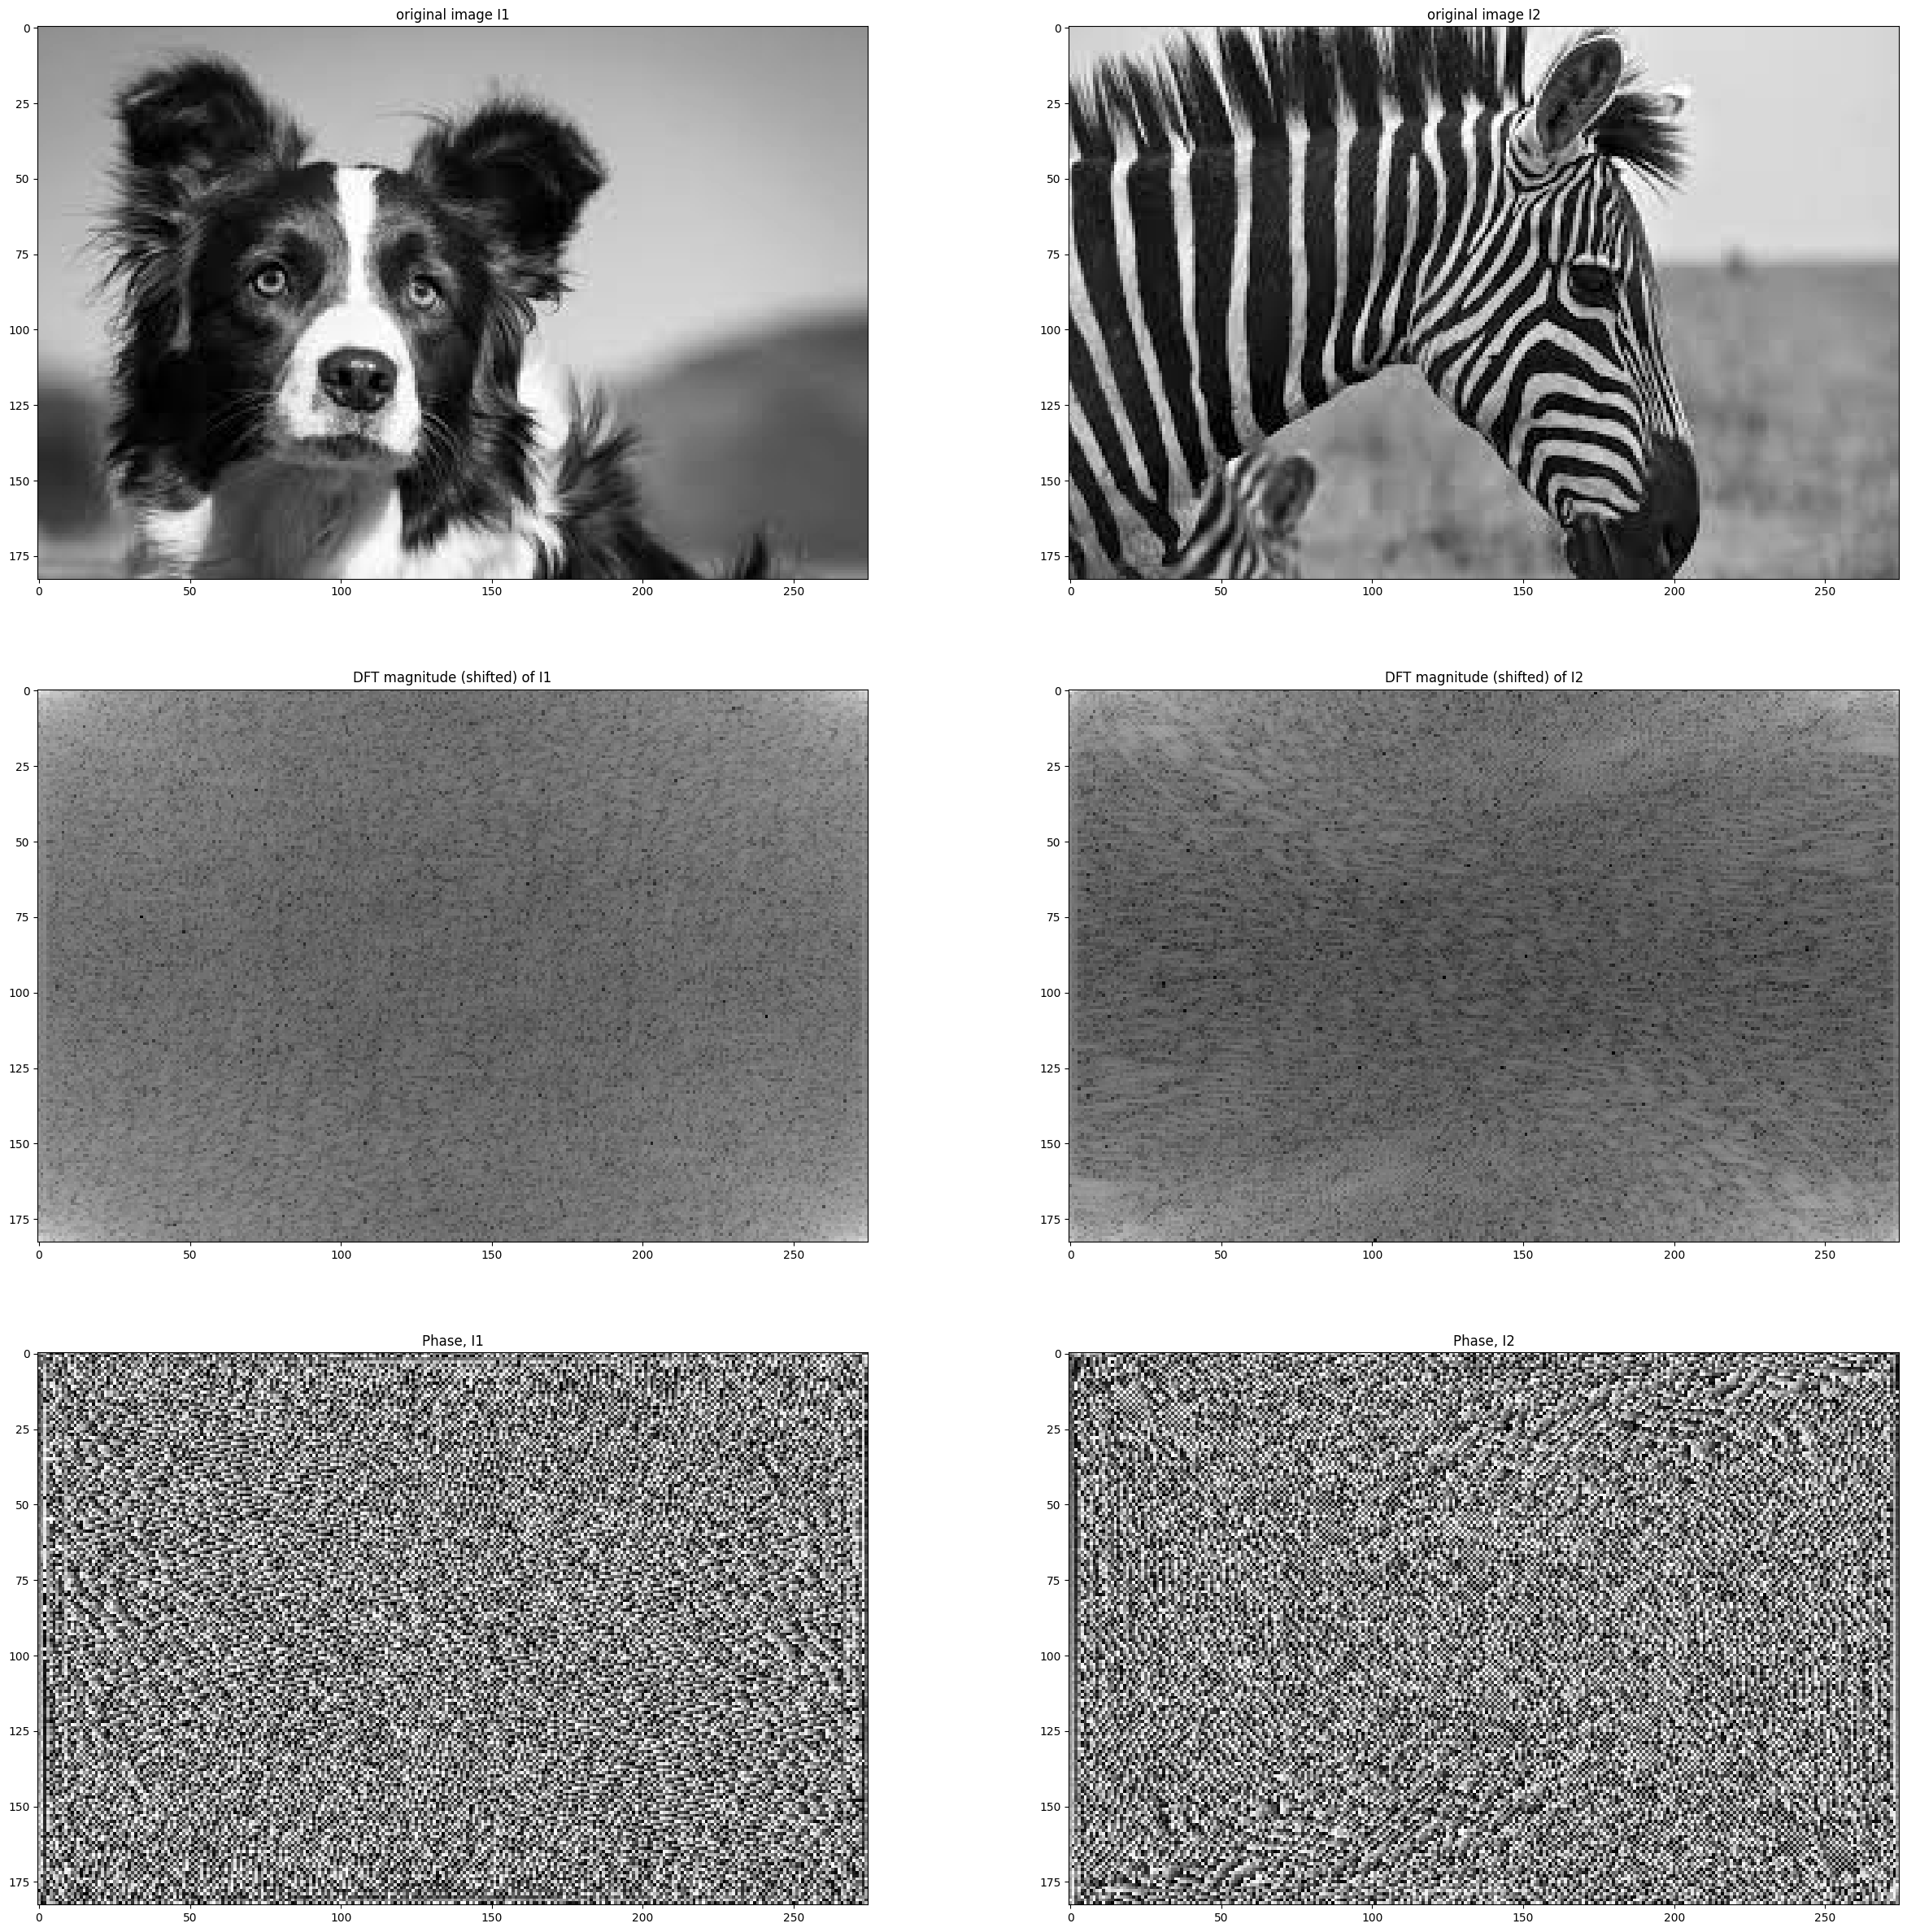

In [5]:
# Herer: find fft , and plot images, magnitude plots and phase plots.

I1 = cv2.imread("images/BorderCollie.jpeg", cv2.IMREAD_GRAYSCALE)
I2 = cv2.imread("images/zebra.jpeg", cv2.IMREAD_GRAYSCALE)

# insert code
DFT_I1 = np.fft.fft2(I1)
DFT_SHIFT_I1 = np.fft.fftshift(DFT_I1)
DFT_I2 = np.fft.fft2(I2)
DFT_SHIFT_I2 = np.fft.fftshift(DFT_I2)

# magnitude
mag_I1 = np.sqrt(np.real(DFT_I1)**2 + np.imag(DFT_I1)**2)
mag_I2 = np.sqrt(np.real(DFT_I2)**2 + np.imag(DFT_I2)**2)

# Phase
phase_I1 = np.angle(DFT_I1)
phase_I2 = np.angle(DFT_I2)

# fill out the missing:

plt.figure(figsize=(30,30))
plt.subplot(321),plt.imshow(I1, cmap="gray")
plt.title('original image I1')
plt.subplot(322),plt.imshow(I2, cmap="gray")
plt.title('original image I2')
plt.subplot(323),
plt.imshow(np.log(1+mag_I1) ,cmap="gray")
plt.title('DFT magnitude (shifted) of I1')
plt.subplot(324),
plt.imshow(np.log(1+mag_I2) ,cmap="gray")
plt.title('DFT magnitude (shifted) of I2')
plt.subplot(325)
plt.imshow(phase_I1 ,cmap="gray")
plt.title('Phase, I1')
plt.subplot(326),
plt.imshow(phase_I2 ,cmap="gray")
plt.title('Phase, I2')
plt.show()

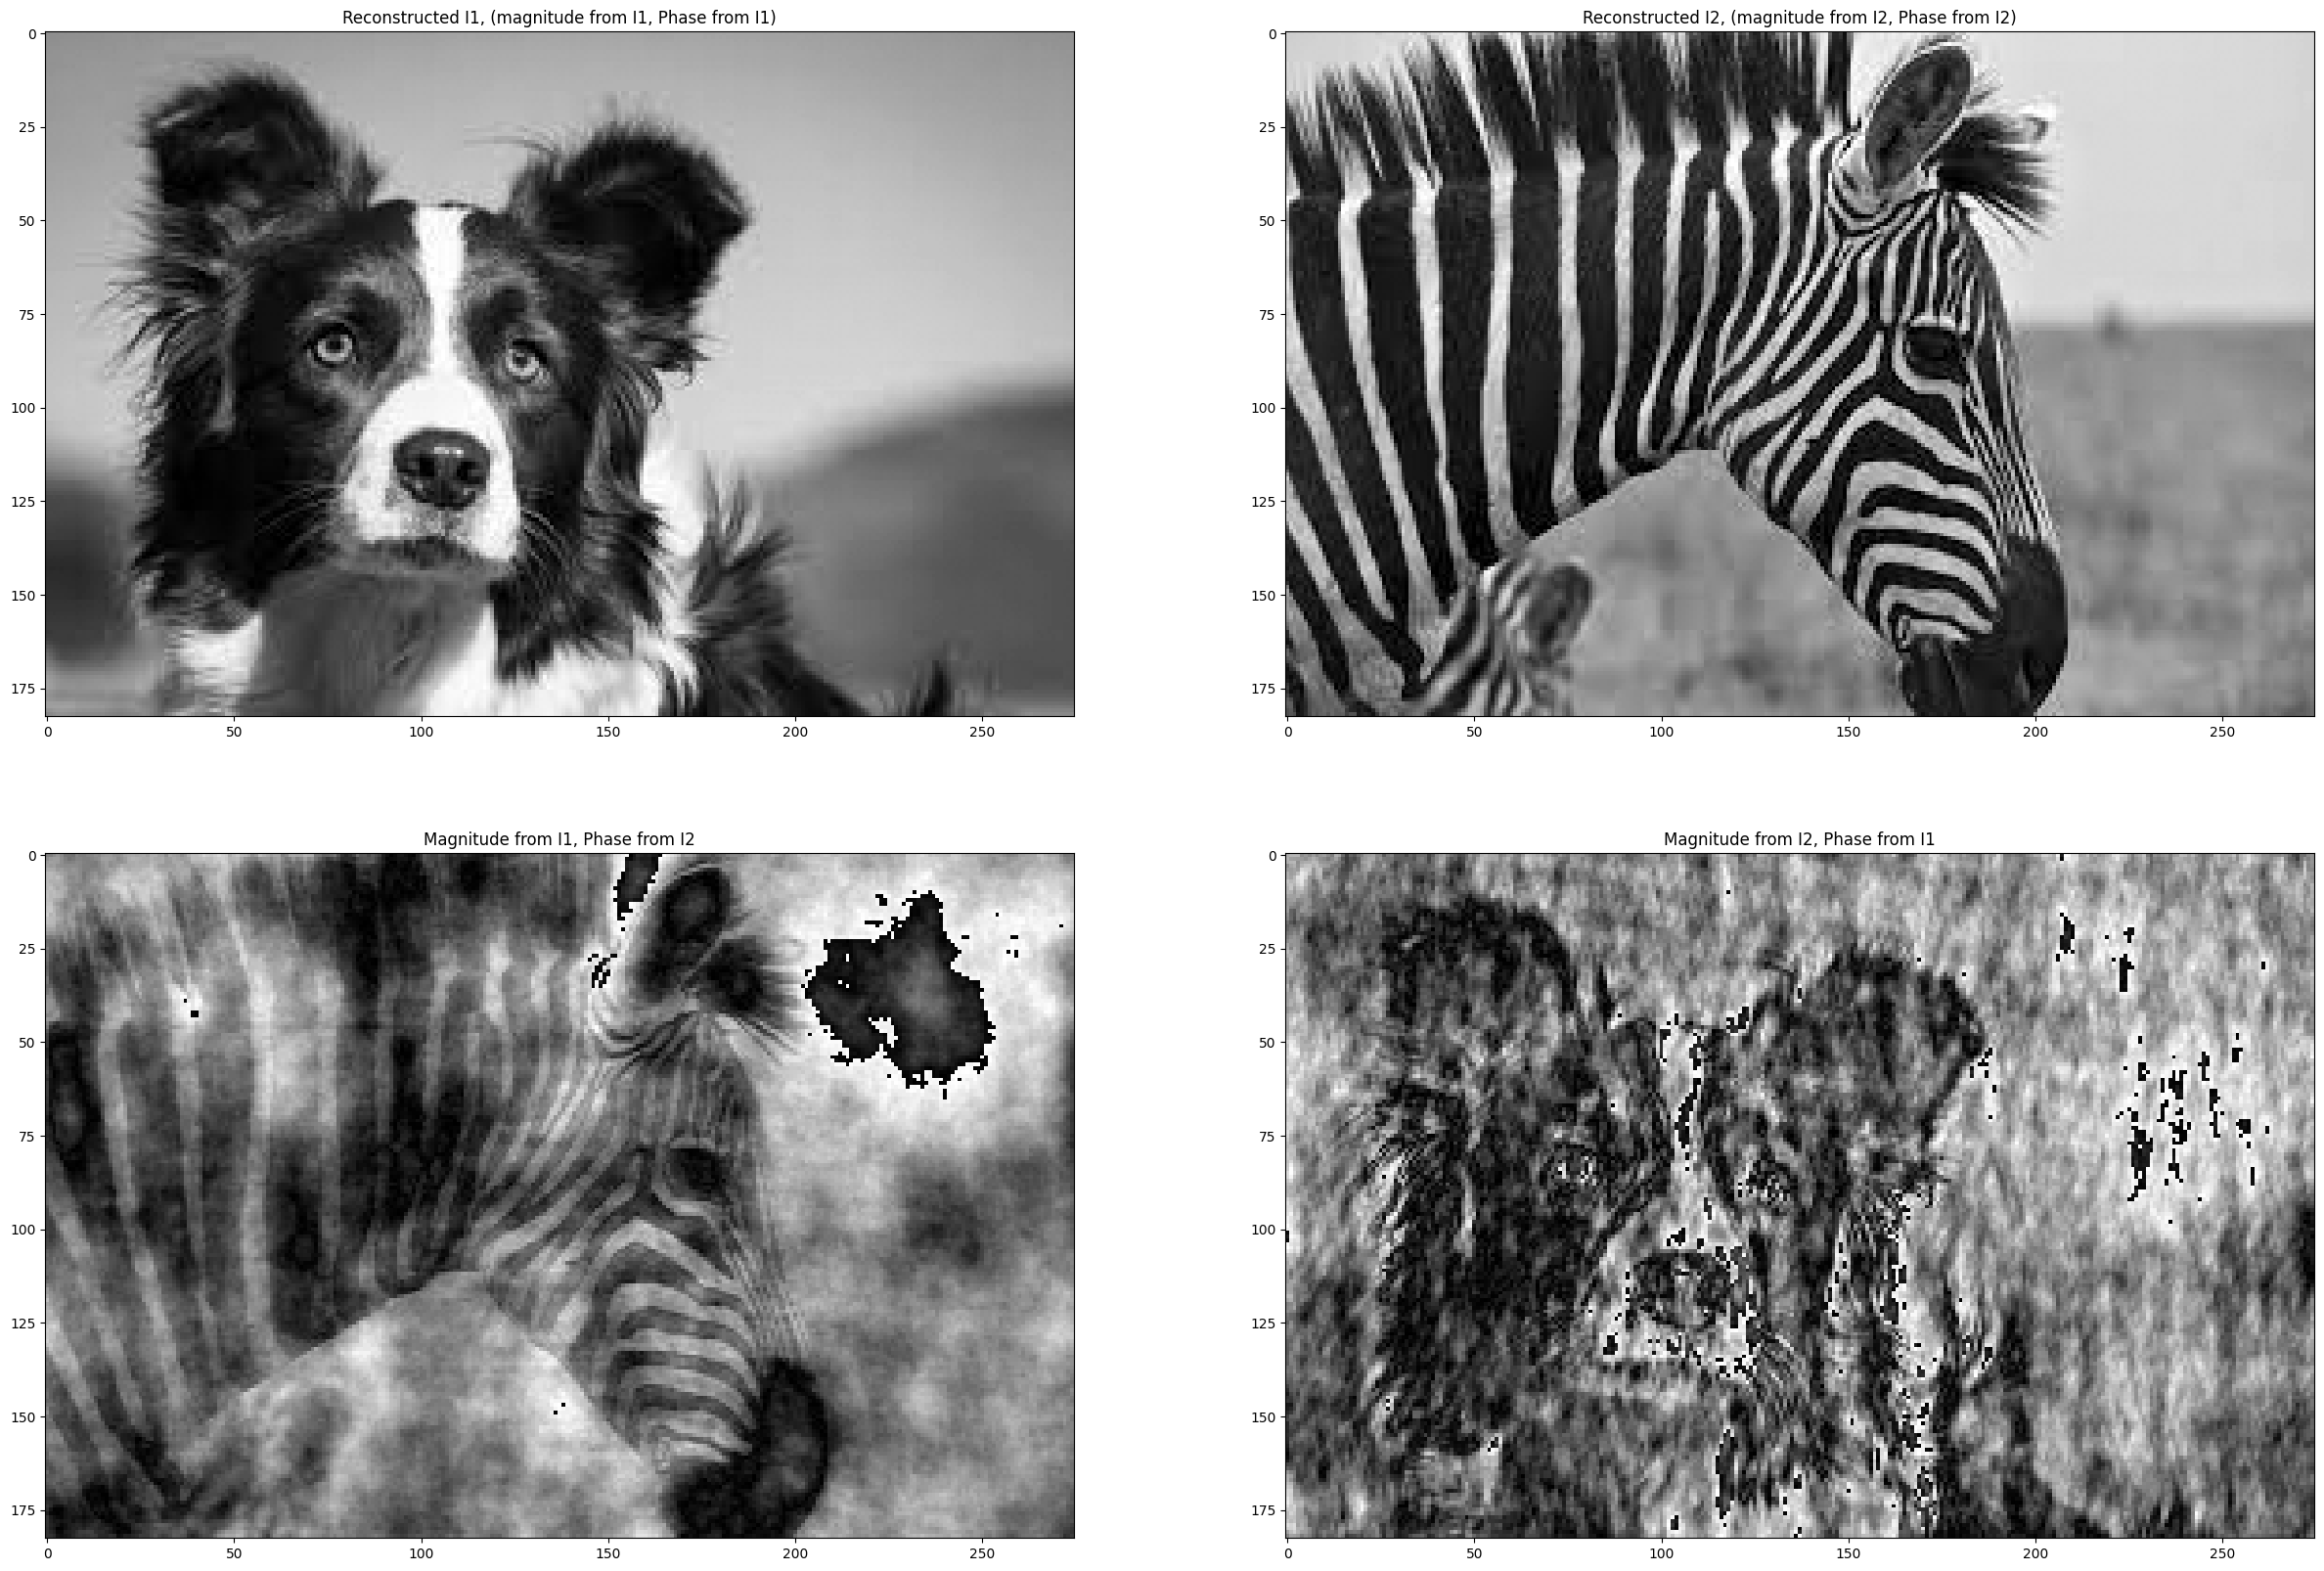

In [6]:
# Use this to find real and imaginary parts of the combined images:
#real_part = magnitude * np.cos(phase)
#imaginary_part = magnitude * np.sin(phase)

#  Splitting up into real and imaginary, putting back together and do IDFT for one image.  Does not change image:
real_I1 = mag_I1 * np.cos(phase_I1)
imag_I1 = mag_I1 * np.sin(phase_I1)
real_I2 = mag_I2 * np.cos(phase_I2)
imag_I2 = mag_I2 * np.sin(phase_I2)

rec1 = np.abs(np.fft.ifft2(real_I1 + 1j*imag_I1)).astype(np.uint8)
rec2 = np.abs(np.fft.ifft2(real_I2 + 1j*imag_I2)).astype(np.uint8)

#  Splitting up into real and imaginary using wrong phase, putting back together and do IDFT:  
real_J1 = mag_I1 * np.cos(phase_I2)
imag_J1 = mag_I1 * np.sin(phase_I2)
real_J2 = mag_I2 * np.cos(phase_I1)
imag_J2 = mag_I2 * np.sin(phase_I1)

rec_j1 = np.abs(np.fft.ifft2(real_J1 + 1j*imag_J1)).astype(np.uint8)
rec_j2 = np.abs(np.fft.ifft2(real_J2 + 1j*imag_J2)).astype(np.uint8)

plt.figure(figsize=(30,20))
plt.subplot(221)
plt.imshow(rec1,cmap="gray")
plt.title('Reconstructed I1, (magnitude from I1, Phase from I1)')
plt.subplot(222),
plt.imshow(rec2,cmap="gray")
plt.title('Reconstructed I2, (magnitude from I2, Phase from I2)')
plt.subplot(223)
plt.imshow(rec_j1,cmap="gray")
plt.title('Magnitude from I1, Phase from I2')
plt.subplot(224),
plt.imshow(rec_j2,cmap="gray")
plt.title('Magnitude from I2, Phase from I1')
plt.show()


**b)**   

Take one of the images from the previous section , do the shift so the low frequencies are in the midle of the DFT images.  Thereafter remove low frequencies (high pass filter) or remove high frequencies (loww pass filter) by an ideal filter in the frequency domain.  How can you do that?    Make and image the same size with just ones and zeros.  Let there be zeros in a circle in the midle (for high pass).  How big circle?  That defines the **cutoff-frequency** .  Try different sizes and see.  Use this image as a filter.  Remember convolution (filtering) in space domain is multiplication in the frequency domain.   

**OBS** when transforming back to space domain we might get a complex image since we have tampered with the complex DFT image.  Plot the **magnitude** of the reconstructed image in the space-domain  

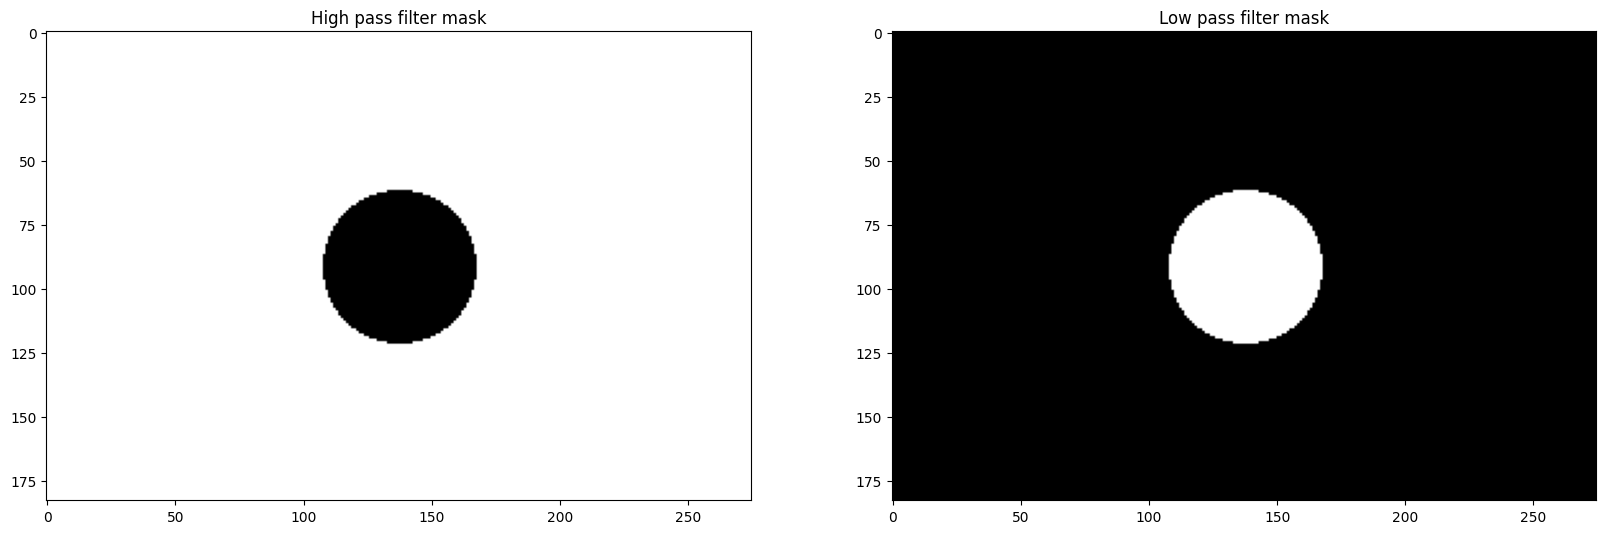

In [7]:
#  Make and plot the ideal filtermask here: 

# initialization: 
high_pass_filter=np.ones_like(I1)
low_pass_filter=np.zeros_like(I1)
rows,cols = I1.shape

cutoff_frequency_hp = 30  # Cutoff frequency in pixels
cutoff_frequency_lp = 30  # Cutoff frequency in pixels

#Create and plot the ideal high-paass filter mask here:
# Circle pixels
for i in range(rows):
    for j in range(cols):
        if np.sqrt((i - rows/2)**2 + (j - cols/2)**2) < cutoff_frequency_hp:
            high_pass_filter[i,j] = 0
        
        if np.sqrt((i - rows/2)**2 + (j - cols/2)**2) < cutoff_frequency_lp:
            low_pass_filter[i,j] = 1

plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(high_pass_filter, cmap='gray')
plt.title('High pass filter mask')
plt.subplot(122)
plt.imshow(low_pass_filter, cmap='gray')
plt.title('Low pass filter mask')
plt.show()

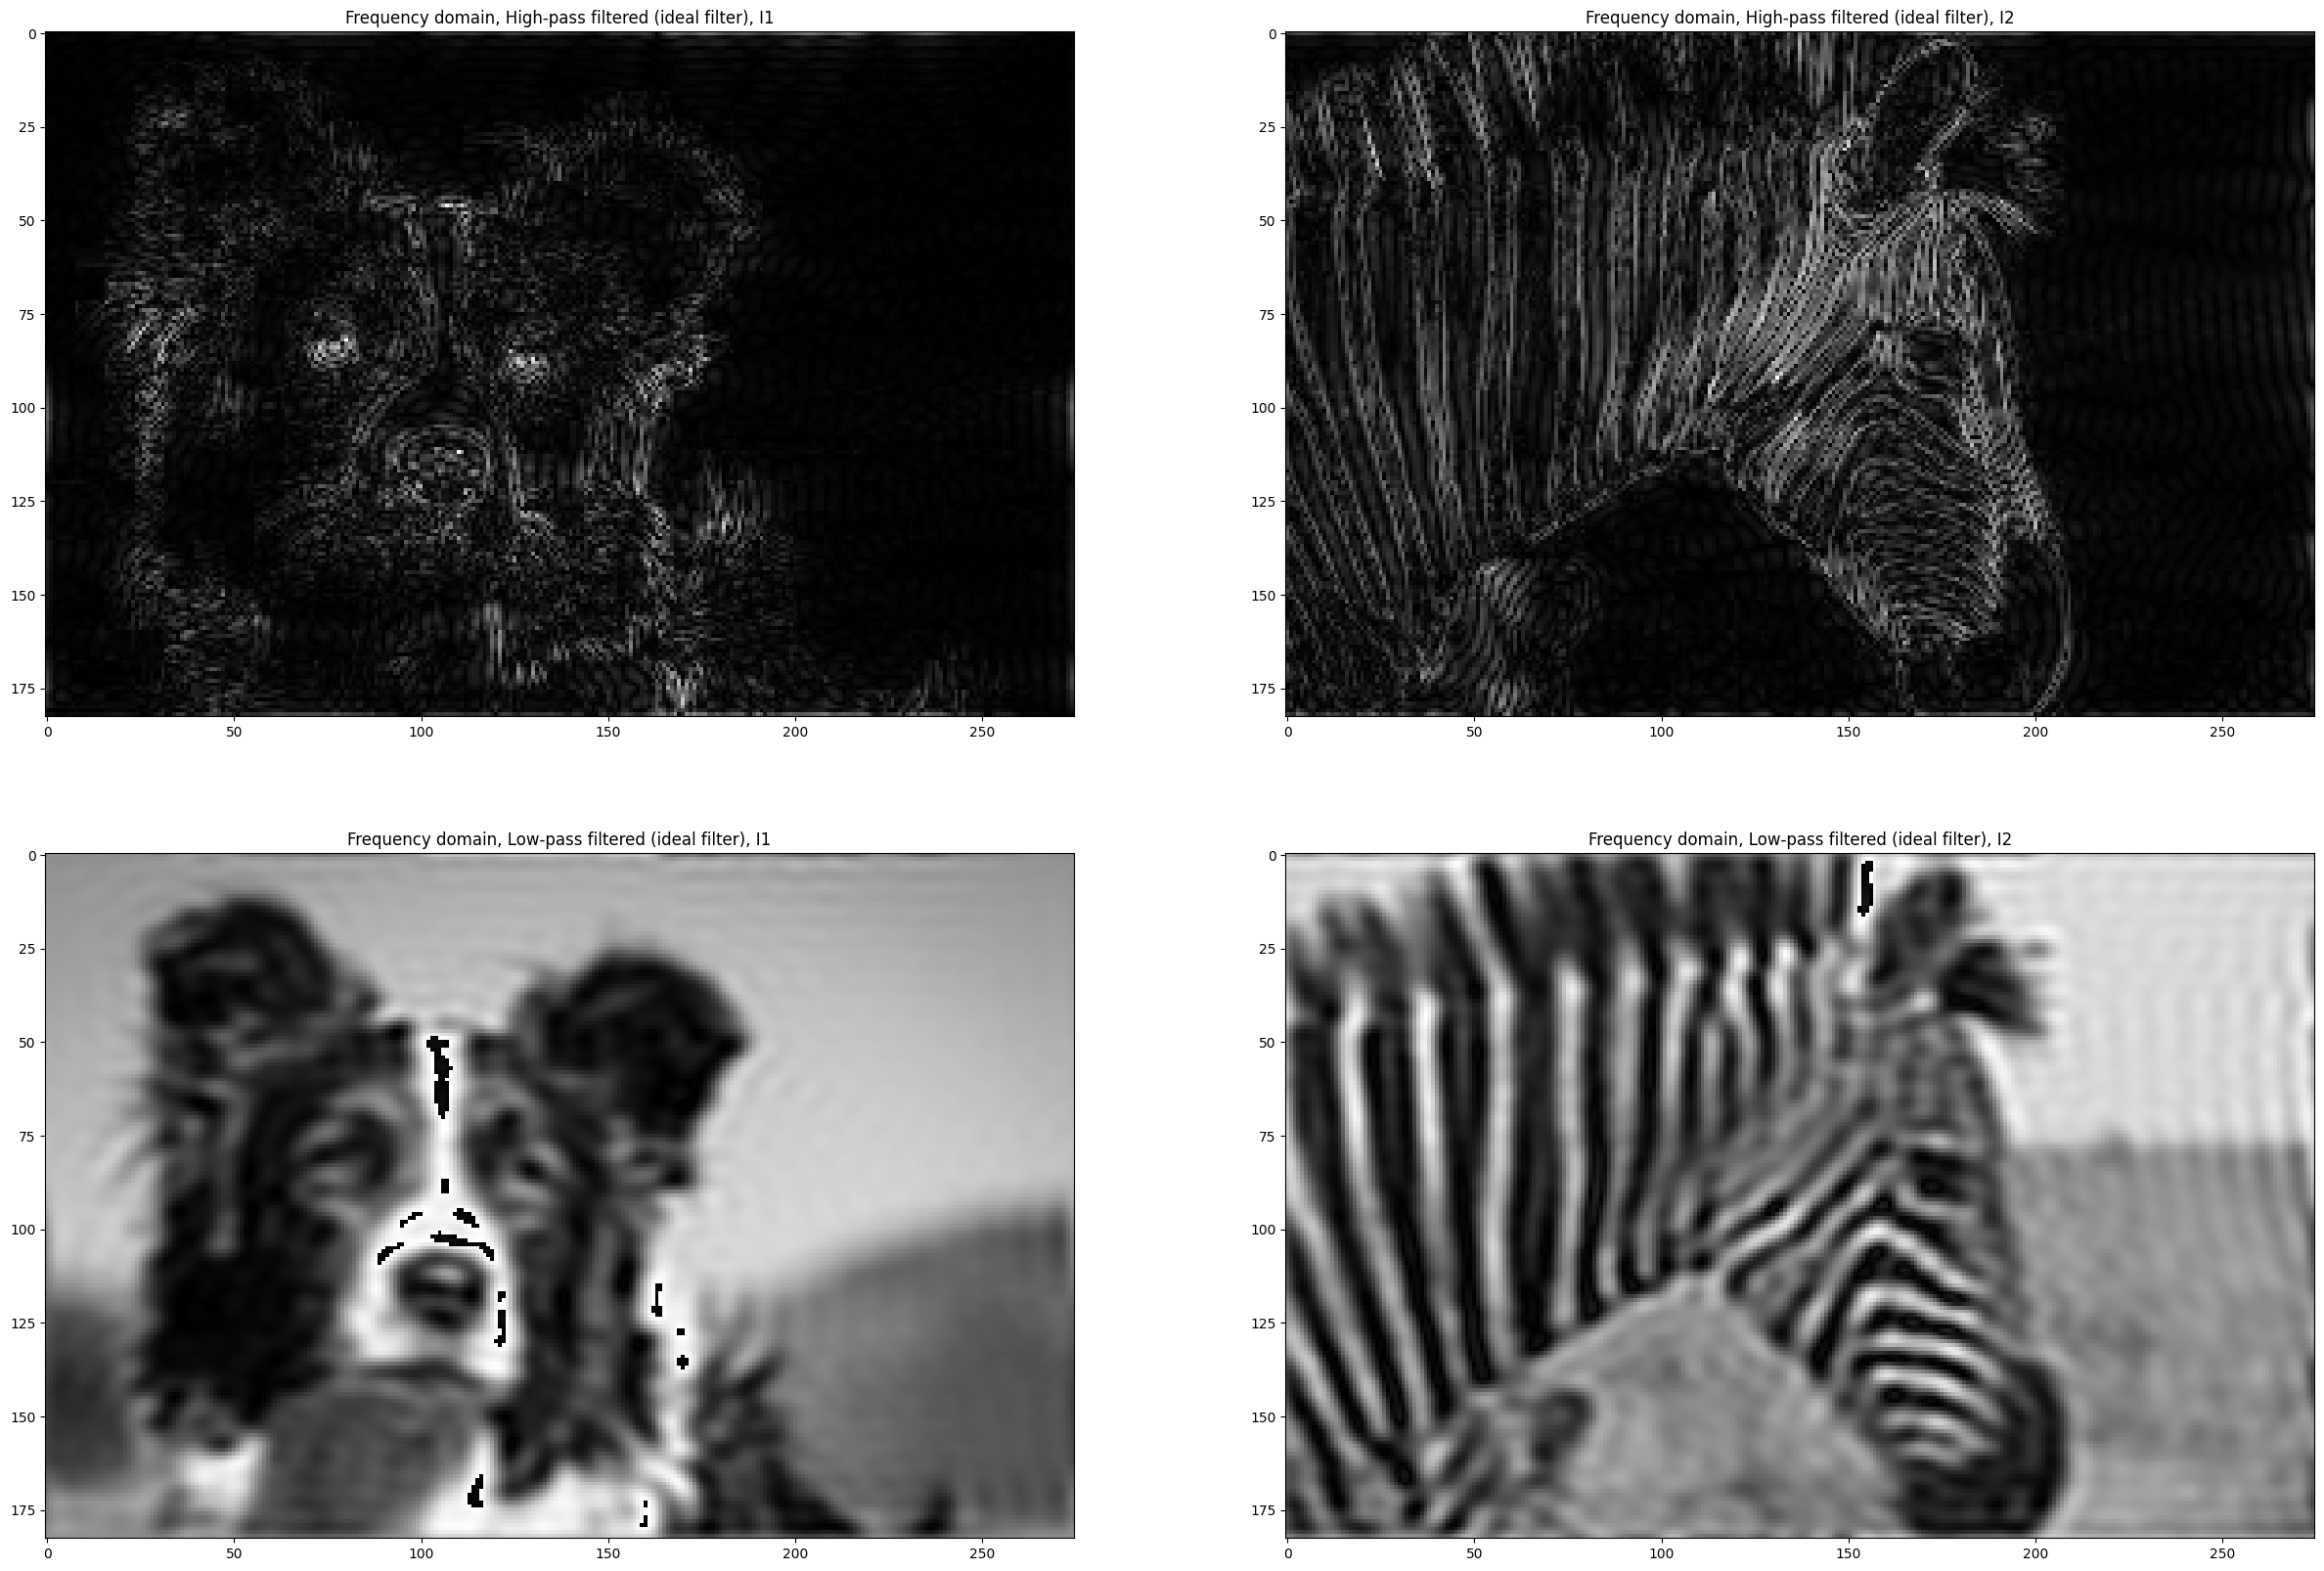

In [8]:
# Use the low-pass filtermask to remove high frequencies and the high-pass filtermask to remove low frequencies in the frequency domain, 
#reconstruct image to the spatial domain and plot it:

I1_HP = np.abs(np.fft.ifft2(DFT_SHIFT_I1 * high_pass_filter)).astype(np.uint8)

I2_HP = np.abs(np.fft.ifft2(DFT_SHIFT_I2 * high_pass_filter)).astype(np.uint8)

I1_LP = np.abs(np.fft.ifft2(DFT_SHIFT_I1 * low_pass_filter)).astype(np.uint8)

I2_LP = np.abs(np.fft.ifft2(DFT_SHIFT_I2 * low_pass_filter)).astype(np.uint8)

plt.figure(figsize=(30,20))
plt.subplot(221)
plt.imshow(I1_HP,cmap="gray")
plt.title('Frequency domain, High-pass filtered (ideal filter), I1')
plt.subplot(222),
plt.imshow(I2_HP,cmap="gray")
plt.title('Frequency domain, High-pass filtered (ideal filter), I2')
plt.subplot(223)
plt.imshow(I1_LP,cmap="gray")
plt.title('Frequency domain, Low-pass filtered (ideal filter), I1')
plt.subplot(224),
plt.imshow(I2_LP,cmap="gray")
plt.title('Frequency domain, Low-pass filtered (ideal filter), I2')
plt.show()